In [17]:
#import our Neural Net with 3 layers. Change path depending on where the script is located
exec(open("../Utilities/NNx3.py").read())
import pandas as pd
import numpy as np

In [18]:
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('W1data.csv')
dfTest = pd.read_csv('W1TestData.csv')
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivar 1,Cultivar 2,Cultivar 3
0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0,0
1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0,0
2,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1,0,0
3,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,1,0,0
4,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,1,0,0


In [20]:
# Get labels
y = df[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values

# Get inputs; we define our x and y here.
X = df.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1)
X.shape, y.shape # Print shapes just to check
X = X.values

Loss after iteration 0 : 1.4619703912286877
Accuracy after iteration 0 : 24.539877300613497 %
Loss after iteration 100 : 0.5410202294391878
Accuracy after iteration 100 : 79.75460122699386 %
Loss after iteration 200 : 0.4080293260109097
Accuracy after iteration 200 : 85.88957055214725 %
Loss after iteration 300 : 0.35777911648501554
Accuracy after iteration 300 : 87.73006134969326 %
Loss after iteration 400 : 0.3309813130264834
Accuracy after iteration 400 : 88.95705521472392 %
Loss after iteration 500 : 0.31100773668997195
Accuracy after iteration 500 : 88.95705521472392 %
Loss after iteration 600 : 0.29279721209183823
Accuracy after iteration 600 : 88.95705521472392 %
Loss after iteration 700 : 0.27377332699561086
Accuracy after iteration 700 : 88.95705521472392 %
Loss after iteration 800 : 0.26020299559480736
Accuracy after iteration 800 : 88.95705521472392 %
Loss after iteration 900 : 0.2451752446736815
Accuracy after iteration 900 : 88.95705521472392 %
Loss after iteration 1000 : 

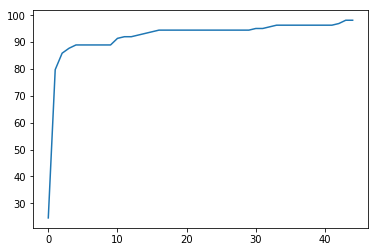

In [21]:
#need to make random start from a base of 0
np.random.seed(0)
#epochs is one full training forward and back propagation
#LEarning rate is hoow rapidly the parameters change
# This is what we return at the end
model = initialise_parameters(nn_input_dim=13, nn_hdim= 5, nn_output_dim= 3)
model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.plot(losses)

In [22]:
# Get labels
yTest = dfTest[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values

# Get inputs; we define our x and y here.
XTest = dfTest.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1)
XTest.shape, yTest.shape # Print shapes just to check
XTest = XTest.values

In [23]:
#now test on our test file

In [24]:
yTest = predict(model,XTest)

In [25]:
#change the test answers data array into a 1d array that can be compared for measuring the accuracy
answersArray = []
for index, row in dfTest[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].iterrows():
    #print(str(index) +" : "+str((row.values)))
    finalValue = 0;
    for idx, num in enumerate(row.values):
        correctedNum = idx*num
        finalValue += correctedNum
    answersArray.append(finalValue)
    #print(str(index) +":" +str(finalValue))

In [26]:
#The predicted answers
yTest

array([2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2], dtype=int64)

In [27]:
#the real answers
np.array(answersArray)

array([2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2], dtype=int64)

In [28]:
#runn an accuracy score between the predicted numbers and real answers.
accuracy_score(answersArray, yTest)

1.0